# Programming with Python
#### Vedran Šego, [vsego.org](http://vsego.org/)

## Contents:

1. How warm was Europe in the past 500(ish) years?

# How warm was Europe in the past 500(ish) years?

**Problems.** Let us solve the following related problems:

1. What were the extreme average temperatures in the past 500 years in Europe?

2. How did the temperature change?

3. What did it look like at a certain point in time (a date or some approximant of that)?

## The data

Obviously, Python itself does not provide the needed data. This is where searching the internet comes in handy, leading us to 
[the historical paleoclimatological data](http://www.ncdc.noaa.gov/data-access/paleoclimatology-data/datasets/historical) of the [NCDC (National Climatic Data Center)](http://www.ncdc.noaa.gov/). From their FTP site (<tt>ftp://ftp.ncdc.noaa.gov/pub/data/paleo/historical/</tt>) we can download various data.

Some of the data, along with other info and the copyright notice, is available in the file [<tt>europe-seasonal.txt</tt>](10a-temps/eu-data/europe-seasonal.txt) (`ftp://ftp.ncdc.noaa.gov/pub/data/paleo/historical/europe-seasonal.txt`). The data itself looks like this:

```
Year        DJF         MAM        JJA         SON        Annual
1500      -0.945       7.157      17.483       8.990       8.166
1501      -0.850       7.435      17.401       8.687       8.163
1502      -1.053       6.872      17.906       9.071       8.194
...
2002       0.207       9.214      18.905       9.301       9.508
2003      -1.101       8.521      19.615       9.838       9.374
2004       0.187       8.297      18.325      10.073       9.235
```

The column `"year"` holds the year of each row's data `"DJF"` stands for Winter (December, January, February), `"MAM"` stands for Spring (March, April, May), `"JJA"` stands for Summer (June, July, August), `"SON"` stands for Autumn (September, October, November), and `"Annual"` is the average temperature for the given year.

We can copy just this part into a new file and save it under some name, for example `"europe-seasonal.dat"`.

Notice that this is not exactly a CSV file like we saw before, as the separators are strings of whitespaces of a varying length. The columns of this file are defined by their length (the year holds 4 characters and the rest hold 12 characters each).

Luckily, this is not a problem: the `split` function that we used earlier uses exactly *strings of whitespaces of a varying length* as separators if it's not given a different one. So, one line from the above file can be split like this:

```python3
year,djf,mam,jja,son,annual = line.strip().split()
```

The additional `strip()` call removes leading and trailing whitespaces (each line ends with a new-line characters that we want to remove). However, **don't forget:** each of the `year`, `djf`, `mam`, `jja`, `son`, and `annual` is a string now and needs to be converted to either `int` or `float` if we are to use it as such.

**A note on organizing our code.** Given that we want to write several programs dealing with the same data, creating a module with some common functionality is a reasonable way to go.

The first function to write would be the one fetching the data from the above file. There are two things to consider here:

1. **What to return?** We can write it to return either an iterator or a list of all values. Since this data set is not very big, the two approaches don't differ much. Still, iterator is usually a better option and we'll do that here.

2. **How to store each year's (row's) data?** Obvious choices are a tuple or a dictionary. The latter is a tad more descriptive, but a tuple is a bit easier to create, so we'll work with tuples. This is really just the matter of a personal choice.

So, what we need to do is read the file line by line, split each line, convert the elements to `int`/`float`, put them in a tuple and `yield` them.

Since we have created our own input file, we can choose the format. It will be as described above, but minus the header row, since we have no use for it. In other words, our file `"europe-seasonal.dat"` looks like this:

```
1500      -0.945       7.157      17.483       8.990       8.166
1501      -0.850       7.435      17.401       8.687       8.163
1502      -1.053       6.872      17.906       9.071       8.194
...
2002       0.207       9.214      18.905       9.301       9.508
2003      -1.101       8.521      19.615       9.838       9.374
2004       0.187       8.297      18.325      10.073       9.235
```

We can now create a function that will read the data from this file:

In [1]:
import os.path

# This is the directory with the data
data_dir = os.path.join("10a-temps", "eu-data")

def seasonal_data(fname = os.path.join(data_dir, "europe-seasonal.dat")):
    """
    Read the seasonal data from a fixed-width column file with the columns
    `year`,
    `djf` (Winter: December, January, February),
    `mam` (Spring: March, April, May),
    `jja` (Summer: June, July, August),
    `son` (Autumn: September, October, November), and
    `annual` (Annual average).
    
    The return value is an iterator that returns the tuple
    `(year, djf, mam, jja, son, and annual)`
    for each row of data.
    
    It is assumed that the file has no header.
    
    If the file does not exist, a `FileNotFoundError` exception is raised.
    """
    with open(fname) as f:
        for line in f:
            fields = line.strip().split()
            # Extract year, convert it to `int`, join it back with
            # the rest of values converted to `float`, and `yield`
            # them all as a tuple
            # The `try...except` block ensures that the faulty data
            # (for example, a header) is ignored
            if len(fields) == 6:
                try:
                    yield tuple([int(fields[0])] + [float(x) for x in fields[1:]])
                except ValueError:
                    continue

Notice the use of `os.path.join` above. While it will generally work to use `"10a-temps/eu-data"` instead of `os.path.join("10a-temps", "eu-data")`, there are situations when it will fail. A good program should always try to avoid those. More details can be found in [this excelent explanation](http://stackoverflow.com/a/24072843/1667018).

Let us now get some basic info about the temperature in Europe in the past 500 years:

In [2]:
# Get data to a list, as to avoid rereading the file several times.
# We can afford this because the file is fairly small.
data = list(seasonal_data())

# Minimums and maximums:
print("The lowest average winter temperature:  {:+7.3f}C".format(min(data, key=lambda t: t[1])[1]))
print("  This happened in the year {}.".format(min(data, key=lambda t: t[1])[0]))
print("The highest average winter temperature: {:+7.3f}C".format(max(data, key=lambda t: t[1])[1]))
print("  This happened in the year {}.".format(max(data, key=lambda t: t[1])[0]))
print("The lowest average summer temperature:  {:+7.3f}C".format(min(data, key=lambda t: t[3])[3]))
print("  This happened in the year {}.".format(min(data, key=lambda t: t[3])[0]))
print("The highest average summer temperature: {:+7.3f}C".format(max(data, key=lambda t: t[3])[3]))
print("  This happened in the year {}.".format(max(data, key=lambda t: t[3])[0]))
min_annual = min(data, key=lambda t: t[5])
max_annual = max(data, key=lambda t: t[5])
print("The average anual temperature varied between {:+.3f}C in {} to {:+.3f}C in {}.".format(
    min_annual[5], min_annual[0],
    max_annual[5], max_annual[0]
))

The lowest average winter temperature:   -4.152C
  This happened in the year 1709.
The highest average winter temperature:  +1.734C
  This happened in the year 1990.
The lowest average summer temperature:  +16.477C
  This happened in the year 1902.
The highest average summer temperature: +19.615C
  This happened in the year 2003.
The average anual temperature varied between +7.006C in 1875 to +9.664C in 2000.


## Remember, remember... the temperature trending and plot

Luckily, we don't need to remember, as the data is in the file. :-)

The above analysis gave us a glimpse of what was going on with our temperature in the second half of the past millennium. However, to truly see what was going on, we should plot this data.

First some setting up for this document:

In [3]:
%matplotlib inline
import matplotlib.pylab as pylab
pylab.rcParams['figure.figsize'] = 10, 7.5

Note that `%matplotlib inline` is **NOT** a Python construct. It's purpose is to tell IPython Notebook (in which these notes are written) to include the plot in the document itself.

As for the remaining two lines, they establish the size of the plot and can be used in Python as well. However, there are usually better ways to do it and this is used merely to set the default values for all the plots produced by the program.

We are now ready to do some basic plotting:

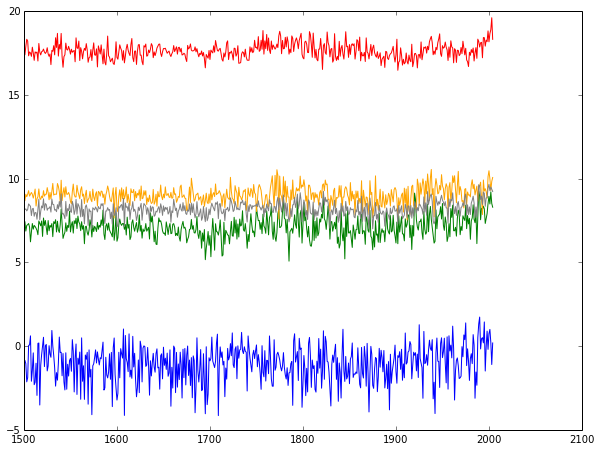

In [4]:
import matplotlib.pyplot as plt

years = list()
djfs = list()
mams = list()
jjas = list()
sons = list()
annuals = list()

# There are more Pythonic ways to do this, for example with
# NumPy's transposing or generator expressions, but this is
# more straightforward.
for year,djf,mam,jja,son,annual in seasonal_data():
    years.append(year)
    djfs.append(djf)
    mams.append(mam)
    jjas.append(jja)
    sons.append(son)
    annuals.append(annual)

plt.plot(
    years, djfs, "blue",
    years, mams, "green",
    years, jjas, "red",
    years, sons, "orange",
    years, annuals, "gray"
)

plt.show()

So, **how does this work?**

1. `import matplotlib.pyplot as plt` imports the basic plotting module.

2. The [function `plot`](http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.plot) takes each dataset as a pair of two lists: x-values and y-values. Therefore, we create the lists of all the years and Spring/Summer/Autumn/Winter/annual temperatures in a very simple `for` loop.

3. We plot each of the lists of values, using `years` as the common list of values for the x-axis.

4. Finally, `plt.show()` tells the system that the plot is ready to be shown.

From the above plot, we can observe several things:

1. Winters are always colder than Springs, which are usually (a bit) colder than Autumns, which are always colder than Summers. Average, as its name suggests, is in the middle. None of this is really surprising.

2. The average temperature varies more for the Winters than for other seasons.

3. Springs are varying more since around the beginning of the 19th century.

What we cannot see are trends. For example, is the temperature rising?

The above numbers suggest that Europe is warming up, because the maximum temperatures in Winter, Summer, and on average have all occured in recent years. However, these are just extremes that may or may not correlate with the general behaviour of the temperature. To observe that, we use [*smoothing*](http://en.wikipedia.org/wiki/Smoothing).

There are many different smoothing algorithms. Here, we shall use the [*moving average*](http://en.wikipedia.org/wiki/Moving_average) in its most simple form. If the temperature for a certain season in year $y$ is given by the variable $L_y$, we create new variables:
$$L'_y := \frac{1}{2r+1} \sum_{k=y-r}^{y+r} L_k,$$
i.e., $L'_y$ is the average value of the temperatures from the year $y-r$ up to (and including) the year $y+r$, where $r$ (the radius) is some given number. Bigger the $r$, smoother the result.

So, how do we smooth a list in Python?

Let us smooth only one element first, the $i$-th one. This means computing the sum $\sum_{k=i-r}^{i+r} L_k$ and dividing it by $2r+1$. This means we need to:

* get a part of the list: `L[i-r:i+r+1]` (the `+1` part is here because the left limit is not included as a part of the new list),

* find its sum: $\sum_{k=i-r}^{i+r} L_k =$`sum(L[i-r:i+r+1])`,

* divide it with `2*r+1`: $\frac{1}{2r+1} \sum_{k=i-r}^{i+r} L_k =$ `sum(L[i-r:i+r+1]) / (2*r+1)`.

Repeating the above for all viable indices `i` can be easily done as a list comprehension:
```python
[ sum(L[i-r:i+r+1])/(2*r+1) for i in range(r, len(L)-r) ]
```

Finally, since we want to do this for a whole list, it is wise to compute `2*r+1` ahead and just store it in some variable.

In [5]:
def smooth(L, r):
    """
    Return a new list obtained from a list `L` by smoothing its values
    for a radius `r`. The returned list is shorter than `L` by `2*r`
    elements because the border values are not smoothed.
    """
    tot = 2*r + 1
    return [ sum(L[i-r:i+r+1])/tot for i in range(r, len(L)-r) ]

Now, the smoothed versions of our temperature lists are easy to obtain:

In [6]:
sdjfs = smooth(djfs, 5)
# Display the first 3 and the last 3 elements of this new list
print("Smoothed Winter temperatures: {}, ..., {}".format(
    ", ".join("{:.3}".format(x) for x in sdjfs[:3]),
    ", ".join("{:.3}".format(x) for x in sdjfs[-3:])
))

Smoothed Winter temperatures: -0.917, -1.04, -1.16, ..., 0.338, 0.197, 0.169


Recall that the smoothed arrays are shorter than the original ones. This means that the `years` list is no longer appropriate for the x-axis and we need to create a new one, with the first and the last `r` elements removed:

In [7]:
r = 5
sdjfs = smooth(djfs, r)
print("len(smooth_djfs) = ", len(sdjfs))
print("len(years) =       ", len(years))
syears = years[r:-r]
print("len(smooth_years) =", len(syears))

len(smooth_djfs) =  495
len(years) =        505
len(smooth_years) = 495


As far as smoothing is concerned, this is it.

However, there are various improvements that can be done to our plot.

First, to make it easier to make some improvements, we take the figure and the sublot reference in two variables:
```python
fig = plt.figure()
ax = plt.subplot(111)
```
This allows us to do the customisations that are related to them, and not just the plots themselves. For example:
```python
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
```
is used to reduce the width of the plotting area by 20% (to 0.8 of its original width), leaving some space on the right side for the legend.

The legend itself is added by the [`legend` function](http://matplotlib.org/users/legend_guide.html):
```python
plt.legend(bbox_to_anchor=(1.03, 1), loc="upper left", borderaxespad=0)
```
The description of the arguments used can be found in the [function's reference](http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.legend).

So, how does the legend get the names of the plots?

This can be done in several different ways, the easiest one being the `plot` command itself. To do that, we draw all the plots one by one:
```python
plt.plot(syears, smooth(djfs, r), color="blue", label="Winter")
plt.plot(syears, smooth(mams, r), color="green", label="Spring")
...
```
The value of the `label` argument is used as a description of the plot in the legend.

We can also add titles to the plot and to its axes:
```python
plt.title("Smoothed temperatures through the century")
plt.xlabel("Year")
plt.ylabel("Temp (C)")
```
A grid is also trivial to add:
```python
plt.grid()
```

Notice how our plot has a big empty space on the right side. This is because the Matplotlib's automation decided that 2100 is a good right limit for the x-axis. However, we might want to use a different value, maybe 2015. We set this by calling the [`axis` function](http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.axis):
```python
plt.axis([1500, 2015, -10, 35])
```
This sets the x-axis to display the values from 1500 to 2015, and the y-axis to display the values from -10 to 35.

Of course, it would be better to derive these limits from the data. Luckily, we know that all the elements of `djf` (the Winter temperatures) are smaller than all the elements of the remaining lists; also, all the ellements of `jja` (the Summer temperatures) are bigger than all the elements of the remaining lists. This simplifies finding minimum and maximum, so our limits can be:
```python
plt.axis( [ years[0], years[-1], min(djfs), max(jjas) ] )
```

Finally, nothing bad will happen if we go a bit wider with the temperatures, i.e., if instead of the interval $[-4.152, 19.615]$ we plot $[-5, 20]$. This can be done by some rounding magic, for example to the next value divisable by 5:
```python
plt.axis( [ years[0], years[-1], 5*floor(min(djfs)/5), 5*ceil(max(jjas)/5) ] )
```
This will add only a minor extra empty space to the top and to the bottom of our plot, but nothing big like the year 2100 added to the right. At the same time, our y-axis labels will turn out nicer.

Instead of just showing it on the screen, we can also save the created plot:
```python
plt.savefig("europe-temps-smooth.png", bbox_inches="tight", dpi=200)
```
The `bbox_inches` defines the padding around the image, while the `dpi` argument stands for "Dots Per Inch". The bigger the value, the bigger the produced image. You can find these and other parameters in the [documentation of the `savefig` function](http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.savefig).

Using what we've seen so far, we can produce the following plot:

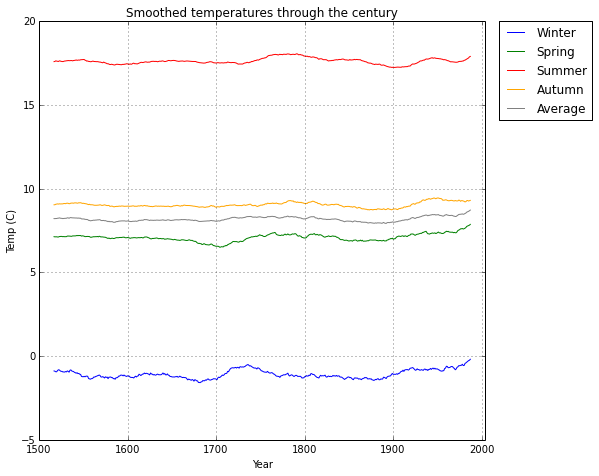

In [8]:
import matplotlib.pyplot as plt
from math import floor, ceil

r = 17

years = list()
djfs = list()
mams = list()
jjas = list()
sons = list()
annuals = list()

fig = plt.figure()
ax = plt.subplot(111)

# There are more Pythonic ways to do this, for example with
# NumPy's transposing or generator expressions, but this is
# more straightforward.
for year,djf,mam,jja,son,annual in seasonal_data():
    years.append(year)
    djfs.append(djf)
    mams.append(mam)
    jjas.append(jja)
    sons.append(son)
    annuals.append(annual)

# Remove the first and the last `r` years as they cannot  be properly smoothed
syears = years[r:-r]
# Compute the smoothed values
plt.plot(syears, smooth(djfs, r), color="blue", label="Winter")
plt.plot(syears, smooth(mams, r), color="green", label="Spring")
plt.plot(syears, smooth(jjas, r), color="red", label="Summer")
plt.plot(syears, smooth(sons, r), color="orange", label="Autumn")
plt.plot(syears, smooth(annuals, r), color="gray", label="Average")

# Shrink the plot
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])

# Add the legend
plt.legend(bbox_to_anchor=(1.03, 1), loc="upper left", borderaxespad=0)

# Define the axes limits
plt.axis([years[0], years[-1], 5*floor(min(djfs)/5), 5*ceil(max(jjas)/5)])

# Title and axes labels
plt.title("Smoothed temperatures through the century")
plt.xlabel("Year")
plt.ylabel("Temp (C)")

# Display grid
plt.grid()

# Save the plot as a PNG image
plt.savefig("europe-temps-smooth.png", bbox_inches="tight", dpi=200)

# Show the plot
plt.show()

Now, this is a much better presentation of the general temperature behaviour in Europe in the past 500 years.

It would be nice to have this plot and some form of the previous one together, overlapping. Or, even better, have a several smoothed versions (for different values of `r`), in a way that the less smoothed ones are less visible, yet still present.

We can do this by plotting as we did above, for several different values of `r`. The only question is how to achieve "less visibility" of certain plots.

Those familiar with image processing probably know what an alpha-channel is. It holds an additional pixel information, not unlike color, that defines transparency of the pixel. The value can be any real number between $0$ and $1$, where $0$ means invisible and $1$ means completely visible.

We shall define our alpha according to `r`, with some tweaking to make the final image look better:

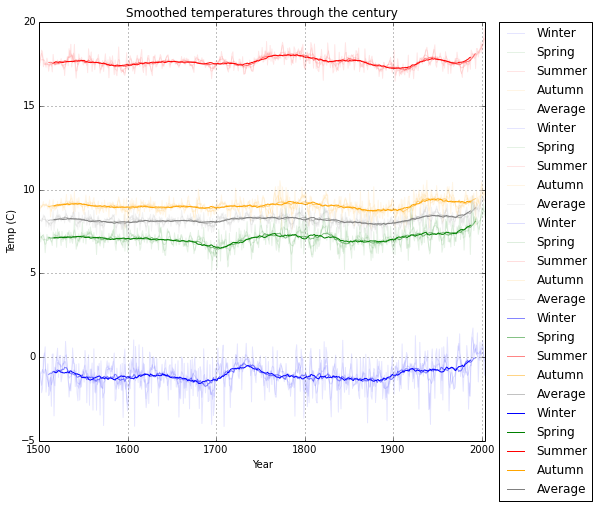

In [9]:
import matplotlib.pyplot as plt
from math import floor, ceil

# Radii for which to do the smoothing (0 = no smoothing)
rs = [ 0, 1, 3, 11, 17 ]

years = list()
djfs = list()
mams = list()
jjas = list()
sons = list()
annuals = list()

fig = plt.figure()
ax = plt.subplot(111)

# There are more Pythonic ways to do this, for example with
# NumPy's transposing or generator expressions, but this is
# more straightforward.
for year,djf,mam,jja,son,annual in seasonal_data():
    years.append(year)
    djfs.append(djf)
    mams.append(mam)
    jjas.append(jja)
    sons.append(son)
    annuals.append(annual)

# Get the smoothed amounts (for each point take the average of
# `r` values to the left and to the right
for r in rs:
    # Remove the first and the last `r` years as they cannot  be properly smoothed
    syears = years[r:-r] if r else years
    # Compute the smoothed values
    alpha = 0.1 + 0.9*(r/rs[-1])**2 if r else 0.1  # 0 = invisible, 1 = fully visible
    plt.plot(syears, smooth(djfs, r), color="blue", alpha=alpha, label="Winter")
    plt.plot(syears, smooth(mams, r), color="green", alpha=alpha, label="Spring")
    plt.plot(syears, smooth(jjas, r), color="red", alpha=alpha, label="Summer")
    plt.plot(syears, smooth(sons, r), color="orange", alpha=alpha, label="Autumn")
    plt.plot(syears, smooth(annuals, r), color="gray", alpha=alpha, label="Average")

# Shrink the plot
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])

# Add the legend
plt.legend(bbox_to_anchor=(1.03, 1), loc="upper left", borderaxespad=0)

# Define the axes limits
plt.axis([years[0], years[-1], 5*floor(min(djfs)/5), 5*ceil(max(jjas)/5)])

# Title and axes labels
plt.title("Smoothed temperatures through the century")
plt.xlabel("Year")
plt.ylabel("Temp (C)")

# Display grid
plt.grid()

# Save the plot as a PNG image
plt.savefig("europe-temps-smooth.png", bbox_inches="tight", dpi=200)

# Show the plot
plt.show()

This looks almost as intended. The only problem is the abundance of the items in the legend, which is quite normal, since each and every one of our 20 plots (5 of them in 4 different "alpha" versions) has its own label which `legend()` then collects and displays.

To avoid this, we can define the label to be `None` for all but the last `r`:

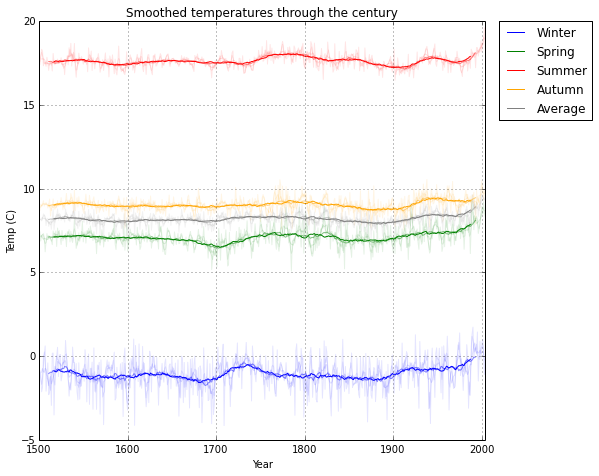

In [10]:
import matplotlib.pyplot as plt
from math import floor, ceil

# Radii for which to do the smoothing
rs = [ 0, 1, 3, 11, 17 ]

years = list()
djfs = list()
mams = list()
jjas = list()
sons = list()
annuals = list()

fig = plt.figure()
ax = plt.subplot(111)

# There are more Pythonic ways to do this, for example with
# NumPy's transposing or generator expressions, but this is
# more straightforward.
for year,djf,mam,jja,son,annual in seasonal_data():
    years.append(year)
    djfs.append(djf)
    mams.append(mam)
    jjas.append(jja)
    sons.append(son)
    annuals.append(annual)

# Get the smoothed amounts (for each point take the average of
# `r` values to the left and to the right
for r in rs:
    # Remove the first and the last `r` years as they cannot  be properly smoothed
    syears = years[r:-r] if r else years
    # Compute the smoothed values
    alpha = 0.1 + 0.9*(r/rs[-1])**2 if r else 0.1  # 0 = invisible, 1 = fully visible
    plt.plot(syears, smooth(djfs, r), color="blue", alpha=alpha, label="Winter" if r == rs[-1] else None)
    plt.plot(syears, smooth(mams, r), color="green", alpha=alpha, label="Spring" if r == rs[-1] else None)
    plt.plot(syears, smooth(jjas, r), color="red", alpha=alpha, label="Summer" if r == rs[-1] else None)
    plt.plot(syears, smooth(sons, r), color="orange", alpha=alpha, label="Autumn" if r == rs[-1] else None)
    plt.plot(syears, smooth(annuals, r), color="gray", alpha=alpha, label="Average" if r == rs[-1] else None)

# Shrink the plot
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])

# Add the legend
plt.legend(bbox_to_anchor=(1.03, 1), loc="upper left", borderaxespad=0)

# Define the axes limits
plt.axis([years[0], years[-1], 5*floor(min(djfs)/5), 5*ceil(max(jjas)/5)])

# Title and axes labels
plt.title("Smoothed temperatures through the century")
plt.xlabel("Year")
plt.ylabel("Temp (C)")

# Display grid
plt.grid()

# Save the plot as a PNG image
plt.savefig("europe-temps-smooth.png", bbox_inches="tight", dpi=200)

# Show the plot
plt.show()

And here is our (overly large) saved image, loaded by the IPython-specific function `Image`:

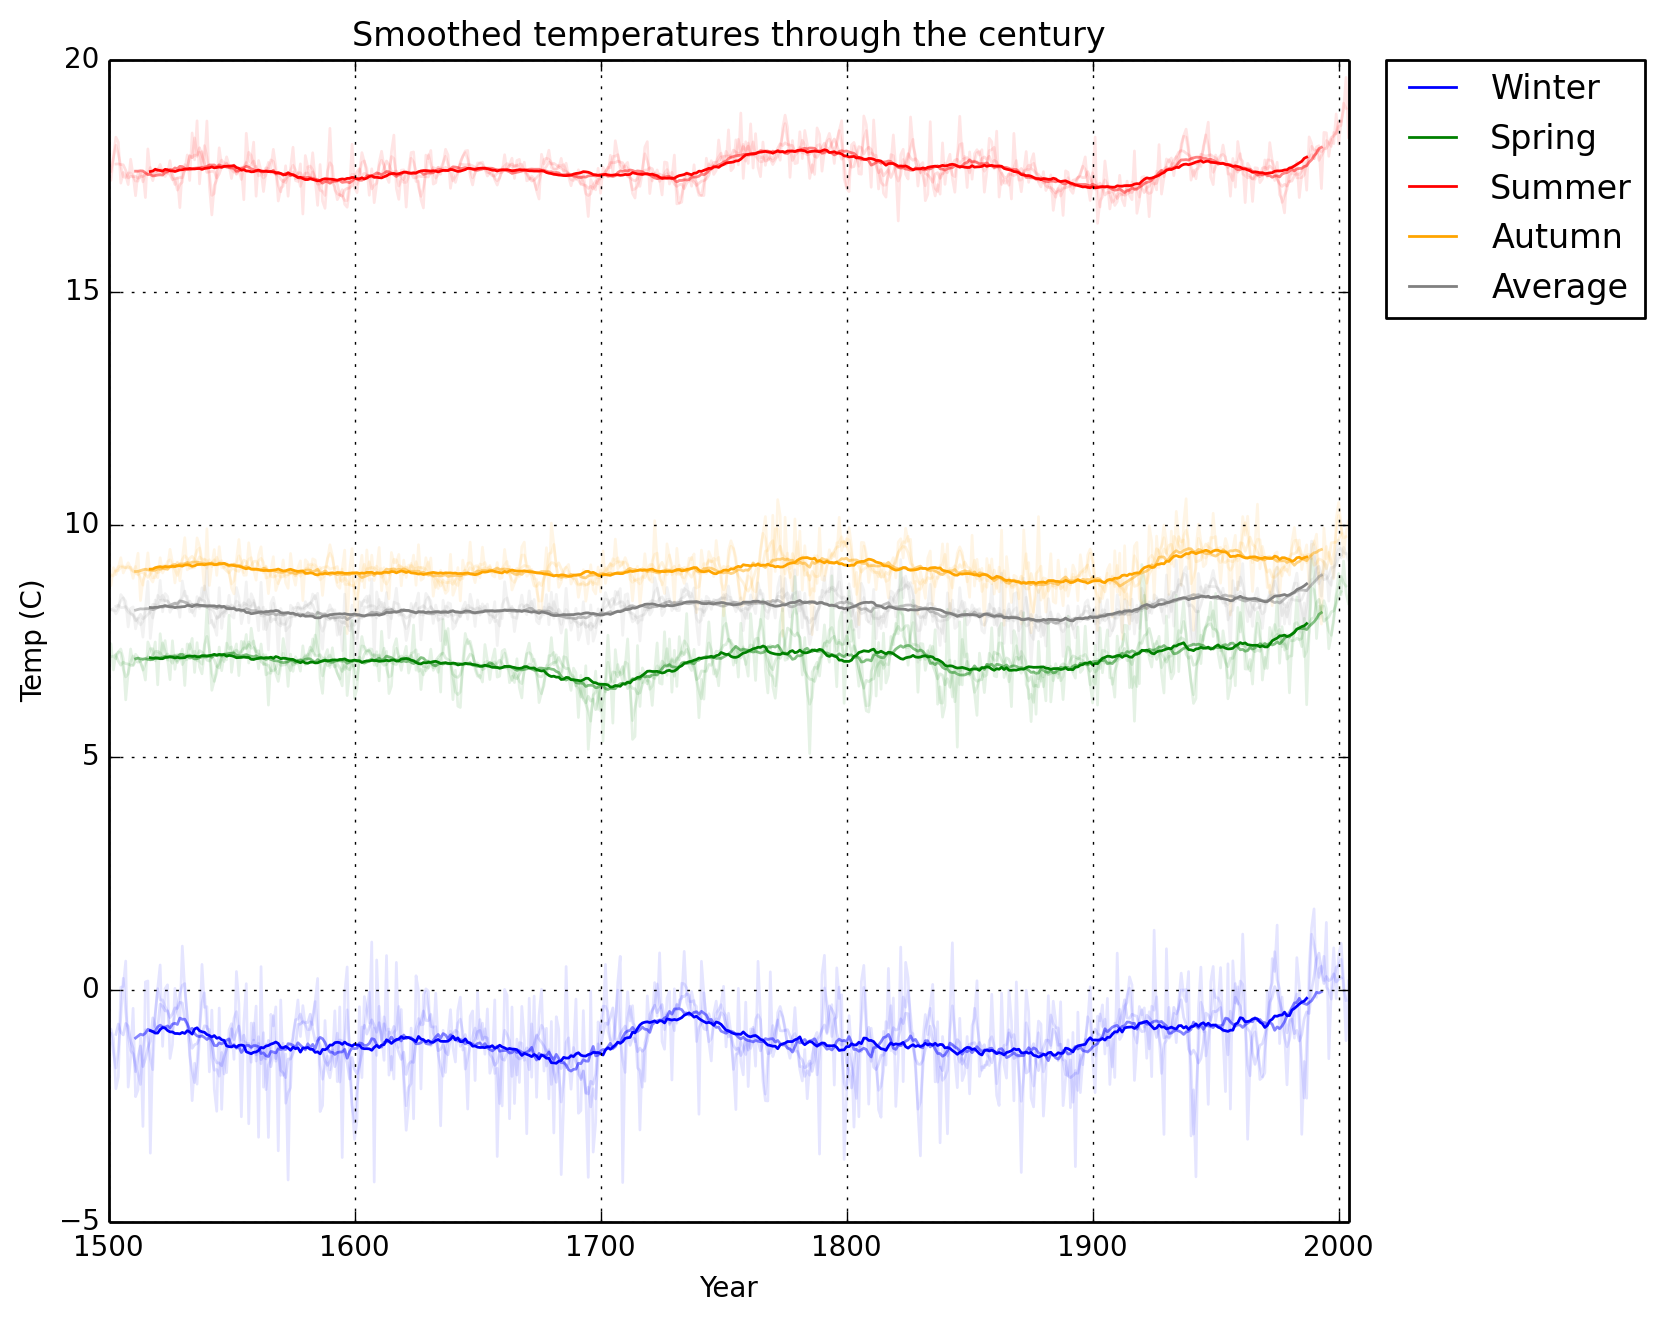

In [11]:
from IPython.display import Image
Image("europe-temps-smooth.png")

## A map

What we did above, we did by using just one of the available tables of data (the one from the file `"europe-seasonal.txt"`). Looking at the other files there (and their descriptions), we can extract more data and we can make more plots reflecting different information.

For this part of the lecture, we focus on the file `TT_Europe_1500_2002_New.GDX` (`ftp://ftp.ncdc.noaa.gov/pub/data/paleo/historical/europe-seasonal-files/TT_Europe_1500_2002_New.GDX`, 143 MB) from

Despite its weird file extension `.GDX`, it is (almost) an ordinary CSV file.

The format is described in the file `Readme_TT_1500_2002.txt` (`ftp://ftp.ncdc.noaa.gov/pub/data/paleo/historical/europe-seasonal-files/Readme_TT_1500_2002.txt`):
```
YearSeason followed by 9100 Gridpoints
Seasons are given as  13(Winter, DJF), 14(Spring, MAM), 15 (Summer, JJA), 16 (Autumn, SON)

Year1Season1 Gridpoint1 Gridpoint2 Gridpoint3 Gridpoint4 .....Gridpointy
Year1Season2 Gridpoint1 Gridpoint2 Gridpoint3 Gridpoint4 .....Gridpointy
.....
Year1Season4 Gridpoint1 Gridpoint2 Gridpoint3 Gridpoint4 .....Gridpointy
Year2Season1 Gridpoint1 Gridpoint2 Gridpoint3 Gridpoint4 .....Gridpointy
....
.
Year2Season4 Gridpoint1 Gridpoint2 Gridpoint3 Gridpoint4 .....Gridpointy
.
.
.
YearendSeason4 Gridpoint1 Gridpoint2 Gridpoint3 Gridpoint4 .....Gridpointy

Therefore, each row consist of year Season and a long string 
with 9100 gridpoints
```
More details are available in the readme file itself.

So, we have some geographic data for the whole Europe, for the last 500 years. One obvious thing to do is making the temperature map for any given year and a season, like this:

![Europe, Winter, 1700](10a-europe-170013.png)

How can we do that?

First, we observe some basic details that are important for designing our program:

1. **The file is quite big** (143 MB) and stuffing it all to memory is not a good idea.  
   However, to draw the map for just one year and season, we only need its corresponding line. So, our program shall read the local copy of the file (downloaded from the internet) line by line until we reach the data that we need. Then we shall collect that data and be done with the file.

2. **What type of plot should we use?**  
   Unless we already have some idea, it is best to check the [Matplotlib gallery](http://matplotlib.org/gallery.html). What would be a good plot type to use? [These](http://matplotlib.org/examples/images_contours_and_fields/interpolation_methods.html) certainly seem nice:  
   ![Interpolation methods](10a-interpolation_methods.png)

3. Obviously, Matplotlib has no idea what our coloured smudges represent (Europe), so **we need an appropriate image to combine with the plot.**  
   This is somewhat tricky, as our data represents square parts of the map, so we must use the map that was created by the appropriate projection (called [*equirectangular projection*](http://en.wikipedia.org/wiki/Equirectangular_projection)) and we need to crop the map so that it fits the data (note: the official description of the data is wrong; the covered area is between 25W-40E and 35N-70N, **not** 30N-70N).  
   This part is beyond the scope of this course. We shall use this image:  
   ![A map of Europe](10a-europe.png)

We are now ready to begin. Let us first define some useful variables and then grab the data:

In [12]:
# Data file name
fname = os.path.join("10a-temps", "eu-data", "TT_Europe_1500_2002_New.GDX")
# Image file name
iname = os.path.join("10a-temps", "images", "europe.png")

# We ommit the input and give year and season directly.
# This can easily be replaced later.
year = 1700
season = 13

# Filtering string, as per the description in the readme file
fltr = "{:04d}{:02d}".format(year, season)

# Grab the data
with open(fname, mode="rt", encoding="utf8") as f:
    for line in f:
        if line[:6] == fltr:
            break
    else:
        print("No data found for {}.".format(fltr))
        exit(1)

data_list = [float(x) for x in line[6:].strip().split()]

Once the first field in the line corresponds to our filter (a `"yyyyss"` string, where `"yyyy"` is a four digit year and `"ss"` is a two-digit season identifier), we stop reading.

The last thing we do is splitting the rest of the line, which contains only temperatures, that we immediatelly convert to floats.

Now, out `data` list contains all the temperatures for the given year and season.

Notice how our data is in a list, and our map requires a grid (a table, a matrix,... some rectangular shape).

Instead of carefully creating a list of lists, we can get some help from NumPy, which is -- in essence -- a system for handling multidimensional arrays. It's basic structure is `ndarray` (which stands for *$n$-dimensional array*), it is created by the [`array` function](http://docs.scipy.org/doc/numpy/reference/generated/numpy.array.html), and it has a neat little function called [`reshape`](http://docs.scipy.org/doc/numpy/reference/generated/numpy.reshape.html) that does exactly what we need:

In [13]:
import numpy as np

# In the program, we can use the same variable.
# Here, we shall need the original list later on, so we keep it as `data_list`.
data = np.array(data_list).reshape((70, 130))

print("The element with indices (53, 31):", data[53,31])

The element with indices (53, 31): 9.11


**Note:** NumPy's `ndarray` allows double indexing, i.e., the element with the indices `(53, 31)` is referenced as `data[53,31]`. If this was an ordinary Pythonic list of lists, we would have to use `data[53][31]`.

Mimicking the example on the [previously linked page](http://matplotlib.org/examples/images_contours_and_fields/interpolation_methods.html), we create the plot:

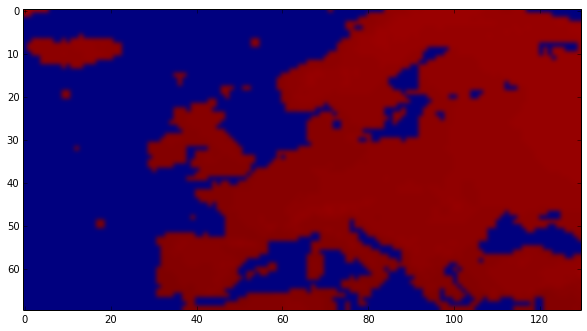

In [14]:
plt.imshow(data, interpolation="bicubic")

While somewhat interesting, this is far from what we've seen above. What happened?

The colours are assigned to the values automatically, with the lowest ones being blue, the highest ones being red, and those in between having other colours.

The readme file says that only the continental temperatures are available. But our data needs to be "matrix-like", so what is there in the locations describing the sea?

Opening the file reveals the secret: those temperatures are given as -999.99. So, our automatic colouring works fine, but all the "interesting" temperatures (from approx. -25C to approx. 40C) are squeezed at the top of the scale, thus all getting coloured red.

In other words, we need to set the proper scale for colouring.

After a bit of Googling, it is easy to find that this is done by the function [<tt>matplotlib.colors.Normalize</tt>](http://matplotlib.org/api/colors_api.html#matplotlib.colors.Normalize), which takes minimum and maximum values.

These are easy to find while avoiding all the values that are not between $-100$ and $+100$:

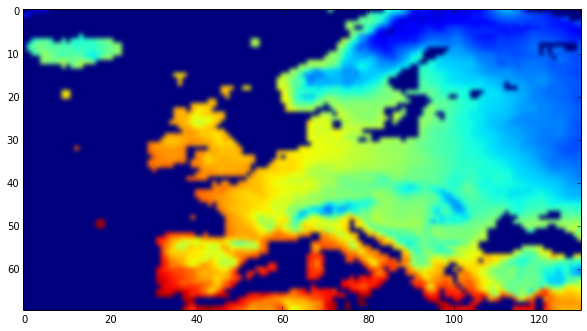

In [15]:
import matplotlib.colors

norm = matplotlib.colors.Normalize(
    vmin=min(fld for fld in data_list if fld > -100),
    vmax=max(fld for fld in data_list if fld < +100)
)
plt.imshow(data, interpolation="bicubic", norm=norm)

This is pretty much what we wanted.

To combine it with the above image (the map of Europe), we look at the gallery again and find [this](http://matplotlib.org/examples/pylab_examples/layer_images.html):

![Combining layers](10a-layer_images.png)

Now, we don't want to use a checker's board as the background, but an image, but the principle is the same.

So, how do we load an image (instead of creating the checkers board)?

Back in the gallery, we quickly find the [Image demo](http://matplotlib.org/examples/images_contours_and_fields/image_demo.html) that does exactly that and almost nothing more. More on dealing with images in Matplolib can be read in Matplotlib's [Image tutorial](http://matplotlib.org/users/image_tutorial.html).

Luckily, both the checkerboard and the image are dealt with using the [function `imshow`](http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.imshow), so merging these examples is easy:

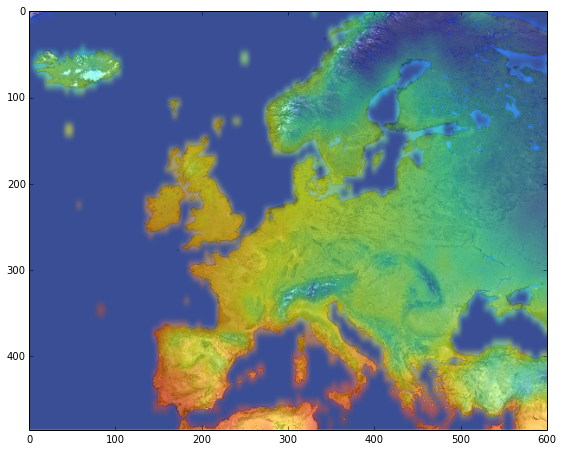

In [16]:
import pylab

img = matplotlib.image.imread(iname)
im_europe = plt.imshow(img)
pylab.hold(True)
im_temps = plt.imshow(data,
    interpolation="bicubic",
    norm=norm,
    alpha=0.43,
    extent=(0,img.shape[1],img.shape[0],0)
)
plt.show()

We cal also add a title and remove the axes labels:

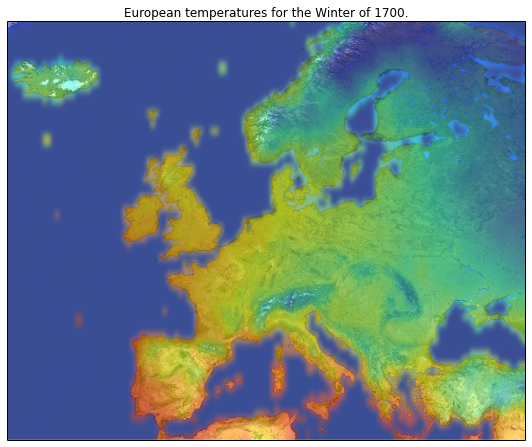

In [17]:
import pylab

seasons = { "13": "Winter", "14": "Spring", "15": "Summer", "16": "Autumn" }

fig = plt.figure()
ax = plt.subplot(111)
img = matplotlib.image.imread(iname)
im_europe = plt.imshow(img)
pylab.hold(True)
im_temps = plt.imshow(data,
    interpolation="bicubic",
    norm=norm,
    alpha=0.43,
    extent=(0,img.shape[1],img.shape[0],0)
)
plt.title("European temperatures for the {} of {}.".format(seasons[str(season)], year))
ax.set_xticks([])
ax.set_yticks([])
plt.show()

Last, but not least, it would be nice to explain what those colours actually mean. Like the legend in the previous example, a map like this can use a colorbar, with the `shrink` argument that makes the colorbar a bit smaller than it would be otherwise. This is trivial to add:

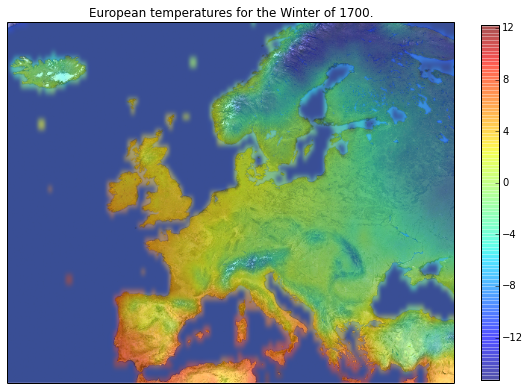

In [18]:
import pylab

seasons = { "13": "Winter", "14": "Spring", "15": "Summer", "16": "Autumn" }

fig = plt.figure()
ax = plt.subplot(111)
img = matplotlib.image.imread(iname)
im_europe = plt.imshow(img)
pylab.hold(True)
im_temps = plt.imshow(data,
    interpolation="bicubic",
    norm=norm,
    alpha=0.43,
    extent=(0,img.shape[1],img.shape[0],0)
)
plt.title("European temperatures for the {} of {}.".format(seasons[str(season)], year))
ax.set_xticks([])
ax.set_yticks([])
plt.colorbar(shrink=0.85)
plt.show()

So, with the program's docstring and `import` statements ommited, here is our program, but this time displaying the [Summer of '69](https://www.youtube.com/watch?v=eFjjO_lhf9c):

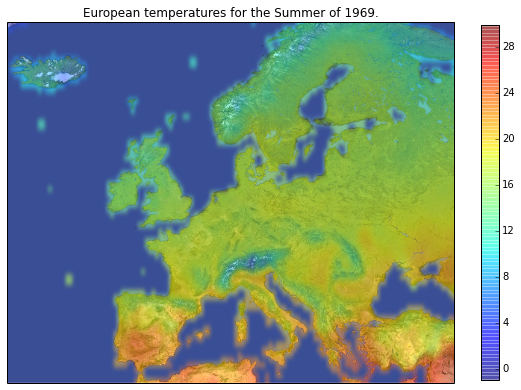

In [19]:
# Data file name
fname = os.path.join("10a-temps", "eu-data", "TT_Europe_1500_2002_New.GDX")
# Image file name
iname = os.path.join("10a-temps", "images", "europe.png")
# Seasons and their codes
seasons = { "13": "Winter", "14": "Spring", "15": "Summer", "16": "Autumn" }

# We ommit the input and give year and season directly.
# This can easily be replaced later.
year = 1969
season = 15

# Filtering string, as per the description in the readme file
fltr = "{:04d}{:02d}".format(year, season)

# Grab the data
with open(fname, mode="rt", encoding="utf8") as f:
    for line in f:
        if line[:6] == fltr:
            break
    else:
        print("No data found for {}.".format(fltr))
        exit(1)

# Convert data from strings to float
data = [float(x) for x in line[6:].strip().split()]

# Prepare a plot
fig = plt.figure()
ax = plt.subplot(111)

# Set colour normalization to min and max values
# between -100 and 100 to avoid junk data (for example,
# -999.99 denotes "no data", i.e., the sea).
norm = matplotlib.colors.Normalize(
    vmin=min(fld for fld in data if fld > -100),
    vmax=max(fld for fld in data if fld < +100)
)

# Reshape the data from a list to a 70x130 matrix
data = np.array(data).reshape((70, 130))

# Get the image
img = matplotlib.image.imread(iname)
im_europe = plt.imshow(img)
pylab.hold(True)

# Create the semi-transparent temperature plot
# with the same extent (dimensions) as the image
im_temps = plt.imshow(data,
    interpolation="bicubic",
    norm=norm,
    alpha=0.43,
    extent=(0,img.shape[1],img.shape[0],0)
)

# Add the colorbar
plt.colorbar(shrink=0.85)

# Set the title
plt.title("European temperatures for the {} of {}.".format(seasons[str(season)], year))
ax.set_xticks([])
ax.set_yticks([])

# Display the plot
plt.show()

## Conclusion

The module, the programs, and the data files (compressed for easier downloading) from this lecture can be downloaded [here](10a-temps.zip) (22MiB). **If reusing and/or redistributing, please keep the readme files and the references to the original sources of data.**

While these are just some examples of what can be done with data in Python, there are specialized modules and packages for dealing with large data and for doing far more advanced data analysis. To learn more, feel free to check [Pandas](http://pandas.pydata.org/), [<tt>statistics</tt> module](https://docs.python.org/3/library/statistics.html), [Statsmodels module](http://statsmodels.sourceforge.net/),...

## References

### Temperaturs data source:

Luterbacher, J., et al.  2006.  
European Seasonal Temperature Reconstructions.  
IGBP PAGES/World Data Center for Paleoclimatology  
Data Contribution Series # 2006-060.  
NOAA/NCDC Paleoclimatology Program, Boulder CO, USA.

### Gridded seasonal absolute surface air temperature for Europe 1500-2002:

Luterbacher, J., Dietrich, D., Xoplaki, E., Grosjean, M., and Wanner, H., 2004:  
European seasonal and annual temperature variability, trends, and extremes since 1500,  
Science 303, 1499-1503 ([DOI:10.1126/science.1093877](http://doi.org/10.1126/science.1093877)).

Xoplaki, E., Luterbacher, J., Paeth, H., Dietrich, D., Steiner N., Grosjean, M., and Wanner, H., 2005:  
European spring and autumn temperature variability and change of extremes over the last half millennium,  
Geophys. Res. Lett., 32, L15713 ([DOI:10.1029/2005GL023424](http://doi.org/10.1029/2005GL023424)).